In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def f(y):
    p, q = y
    return np.array([-np.sin(q), p])

def euler_step(y, h, f):
    return y + h * f(y)

def euler_method(t0, tf, h, y0, f):
    times = np.arange(t0, tf, h)
    ys = np.zeros((len(times), len(y0)))
    ys[0,:] = y0
    for i in range(len(times[:-1])):
        ys[i+1,:] = euler_step(ys[i,:], h, f)
    return times, ys

def symplectic_euler_step(y, h, f):
    p, q = y
    q_next = q + h * p
    p_next = p - h * np.sin(q_next)
    return np.array([p_next, q_next])

def symplectic_euler_method(t0, tf, h, y0, f):
    times = np.arange(t0, tf, h)
    ys = np.zeros((len(times), len(y0)))
    ys[0,:] = y0
    for i in range(len(times[:-1])):
        ys[i+1,:] = symplectic_euler_step(ys[i,:], h, f)
    return times, ys

def modified_euler_step(y, h, f):
    k1 = h * f(y)
    k2 = h * f(y + k1)
    return y + k1/2+k2/2

def modified_euler_method(t0, tf, h, y0, f):
    times = np.arange(t0, tf, h)
    ys = np.zeros((len(times), len(y0)))
    ys[0,:] = y0
    for i in range(len(times[:-1])):
        ys[i+1,:] = modified_euler_step(ys[i,:], h, f)
    return times, ys

def implicit_midpoint_step(y, h, f):
    def g(y_star):
        return y-y_star + h * f((y+y_star)/2)
    result = root(g, y)
    return result.x

def implicit_midpoint_method(t0, tf, h, y0, f):
    times = np.arange(t0, tf, h)
    ys = np.zeros((len(times), len(y0)))
    ys[0,:] = y0
    for i in range(len(times[:-1])):
        ys[i+1,:] = implicit_midpoint_step(ys[i,:], h, f)
    return times, ys

def energy(y):
    p, q = y
    return p**2 / 2 + (1 - np.cos(q))

def numerical_energy(y, h):
    p, q = y
    return p**2 / 2 + (h/2) * p * np.sin(q) + (1 - np.cos(q))

def plot(ys1, ys2, times1, times2, num=False):
    fig, axs = plt.subplots(2, 2, figsize=(10,10))

    axs[0,0].plot(ys1[:,1], ys1[:,0], label=f"h={h1}")
    axs[0,0].set_title("Phase plane")
    axs[0,0].set_xlabel("q")
    axs[0,0].set_ylabel("p")
    axs[0,0].legend()

    axs[0,1].plot(times1, energy(ys1.T), label=f"h={h1}")
    if num==True:
        axs[0,1].plot(times1, numerical_energy(ys1.T, h1), label=f"Numerical, h={h1}")
    axs[0,1].set_title("Energy")
    axs[0,1].set_xlabel("t")
    axs[0,1].set_ylabel("E")
    axs[0,1].legend()


    axs[1,0].plot(ys2[:,1], ys2[:,0], label=f"h={h2}")
    axs[1,0].set_title("Phase plane")
    axs[1,0].set_xlabel("q")
    axs[1,0].set_ylabel("p")
    axs[1,0].legend()

    axs[1,1].plot(times2, energy(ys2.T), label=f"h={h2}")
    if num==True:
        axs[1,1].plot(times2, numerical_energy(ys2.T, h2), label=f"Numerical, h={h2}")
    axs[1,1].set_title("Energy")
    axs[1,1].set_xlabel("t")
    axs[1,1].set_ylabel("E")
    axs[1,1].legend()

    plt.tight_layout()
    plt.show()

t0, tf, h1, h2 = 0, 20, 0.08, 0.04
y0 = np.array([0, 2])




/Users/stephenrobbins/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


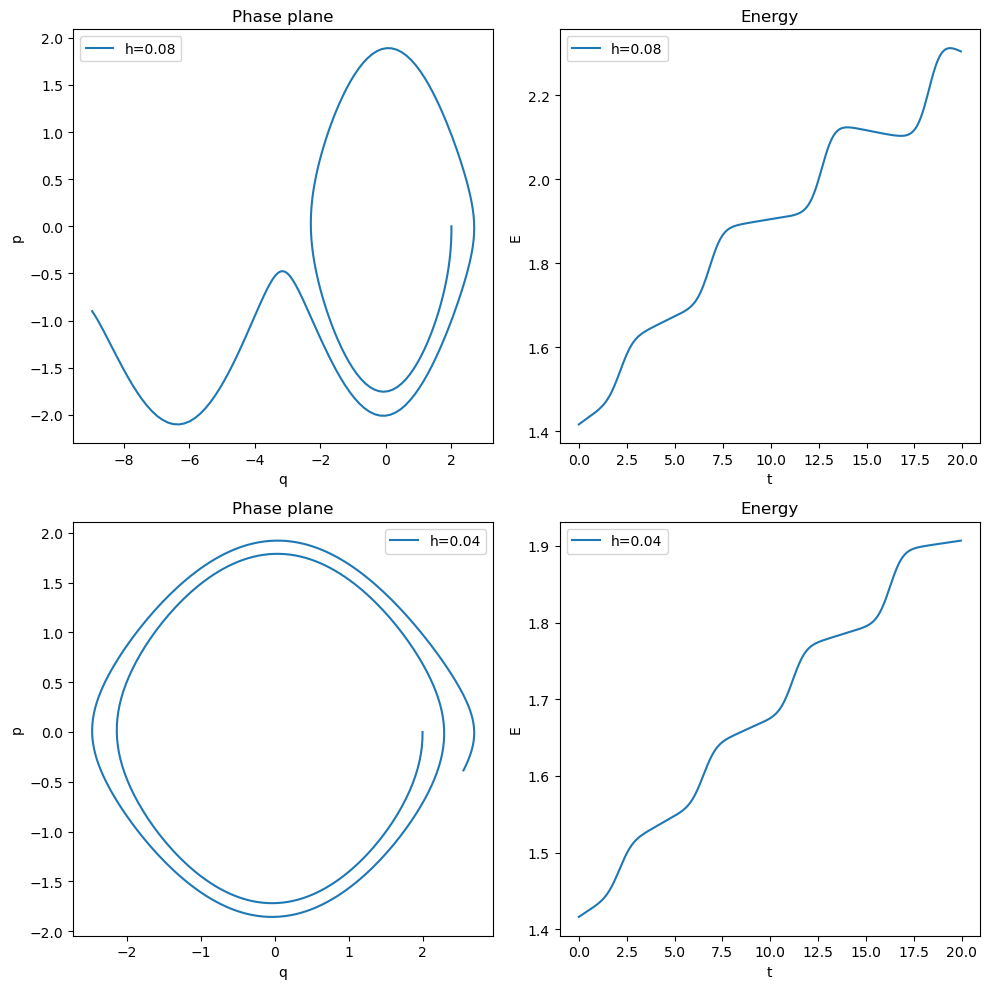

In [3]:
#Part a:
times1, ys1 = euler_method(t0, tf, h1, y0, f)
times2, ys2 = euler_method(t0, tf, h2, y0, f)

plot(ys1, ys2, times1, times2)


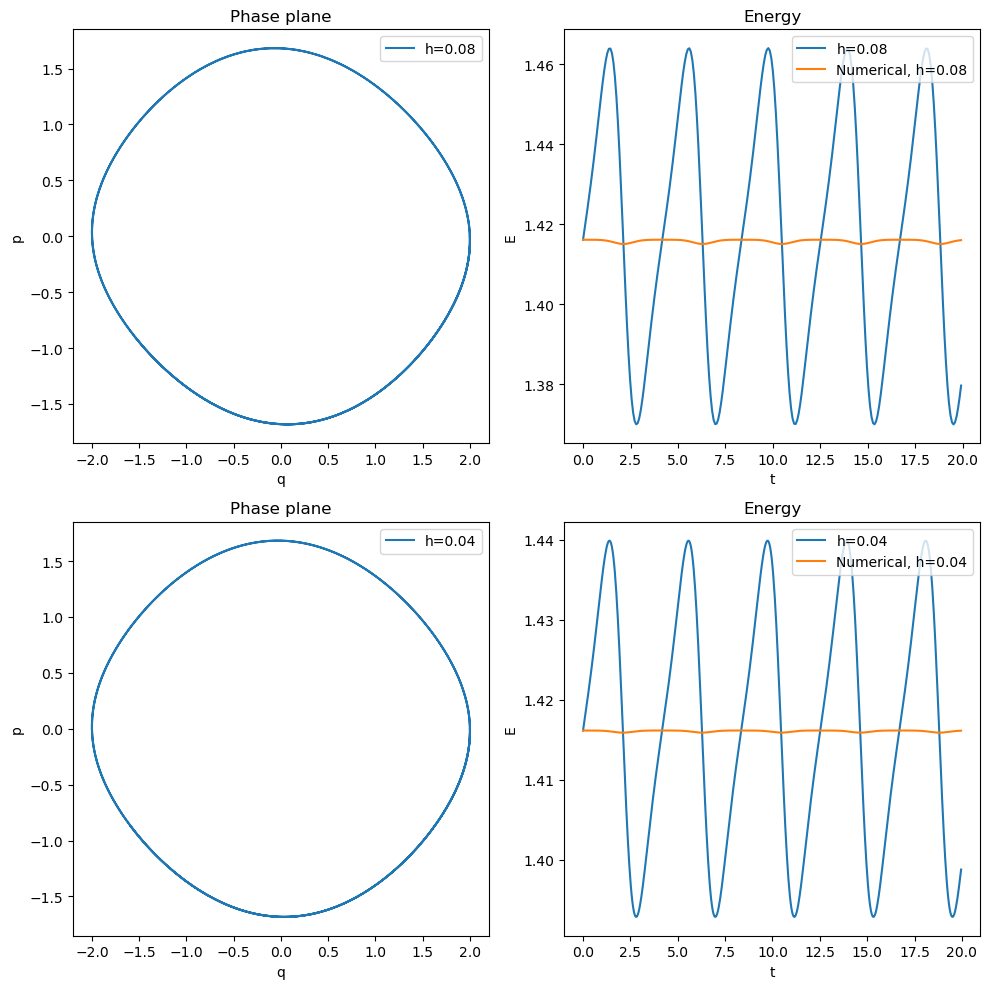

In [4]:
#Part b:
times1, ys1 = symplectic_euler_method(t0, tf, h1, y0, f)
times2, ys2 = symplectic_euler_method(t0, tf, h2, y0, f)

plot(ys1, ys2, times1, times2, num=True)

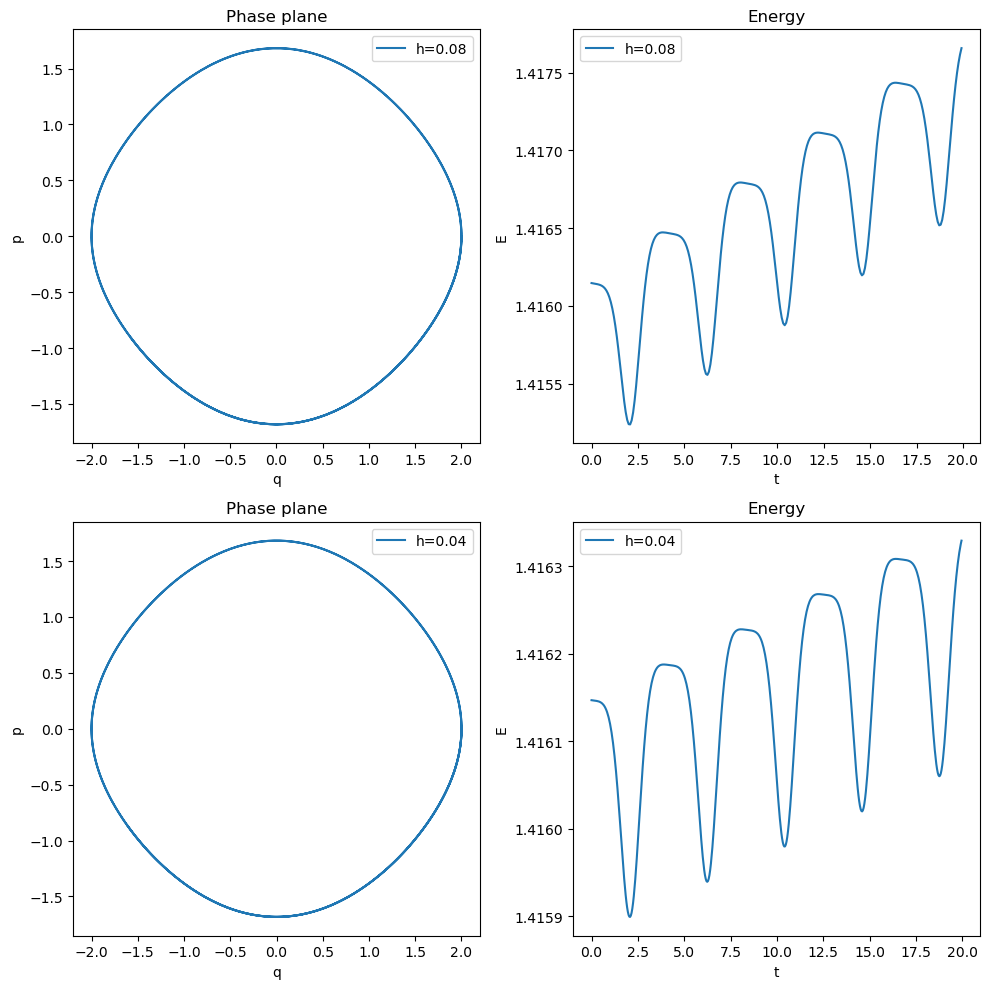

In [5]:
#Part c:
times1, ys1 = modified_euler_method(t0, tf, h1, y0, f)
times2, ys2 = modified_euler_method(t0, tf, h2, y0, f)

plot(ys1, ys2, times1, times2)

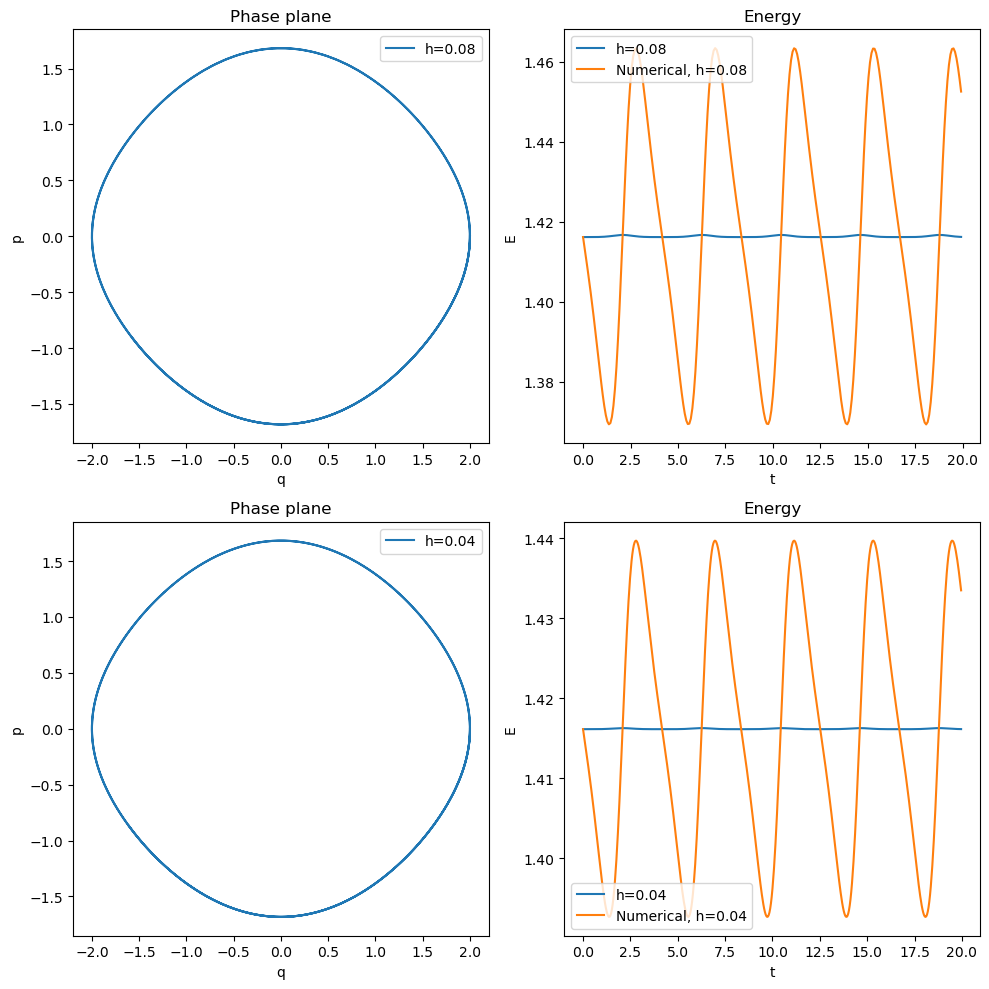

In [6]:
#Part d:
times1, ys1 = implicit_midpoint_method(t0, tf, h1, y0, f)
times2, ys2 = implicit_midpoint_method(t0, tf, h2, y0, f)

plot(ys1, ys2, times1, times2, num=True)

Part E: 
We see that the Symplectic Euler and the Implicit Midpoint preserve the energy, while the Explicit Euler and Modified Euler do not preserve energy. The Explicit Euler was noticable the worst with the the chart diverging from the true solution quickly, even with a smaller h. The Modiefied Euler did much better and looks like it preserves energy by just looking at the (q, p) phase plane, but we shee the energy is increasing from the energy chart and also if we increase the time setp or h, we can see that the Modified Euler does indeed diverge albeit very slowly.

We also see that the Symplectic Euler conserves the numerical energy much better than conserving the energy, while the Implicit Midpoint Method does the opposite. The energy still oscilates, but at a very smal level. I increased the time from 20 to 2000, to see the difference in time it took each method. For the first three, they were similar in speed, each taking around 1.5 second to complete, where as the Implicit Method took 7.5 seconds to complete. This makes the implicit midpont method about 5 times slower, due to us needing to find the roots. I do not know if this slow down is wirth the accuracy we get with the energy and solution

In [11]:
x=modified_euler_method(t0, tf, h1, y0, f)
print(x[1][-1])

[-0.91192285 -1.57265311]
